<a href="https://colab.research.google.com/github/ETorresSacha/Analisis-de-datos/blob/main/analisis_datos_reto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import os
from google.colab import files
import seaborn as sns
from sklearn import  preprocessing
import random

In [ ]:
# Descargar el archivo
# Guardar en Excel
data.to_excel("data7.xlsx", index=False)
files.download('data7.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ANÁLISIS DE DATOS DEL RUL
### TABLA TELEMETRÍA Y ALERTAS

In [2]:
uploaded = files.upload()

Saving rul_potenciaa.xlsx to rul_potenciaa.xlsx


In [ ]:
uploaded = files.upload()

Saving data_ultimo.xlsx to data_ultimo.xlsx


In [ ]:
# para borrar los datos que se subió
os.remove("CAEX_RUL4.xlsx")

In [29]:
data = pd.read_excel(io.BytesIO(uploaded['rul_potenciaa.xlsx']))

/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [30]:
# vamos a crear los ciclos por cada equipo

# Ordenamos primero por equipo y fecha
data = data.sort_values(by=['equipment','fecha_telemetria'])

# Definimos el inicio de un nuevo ciclo cuando:
# - cambia el equipo
# - o el RUL vuelve a subir (después de llegar a 0)
data["new_cycle"] = (
    (data["equipment"] != data["equipment"].shift()) |   # cambio de equipo
    (data["RUL_Horas"] > data["RUL_Horas"].shift())            # RUL "reinicia"
).astype(int)

# Ahora creamos un contador acumulativo de ciclos dentro de cada equipo
data["Ciclo"] = data.groupby("equipment")["new_cycle"].cumsum()

# Eliminamos la columna auxiliar
data = data.drop(columns=["new_cycle"])

# Mover columna Ciclo a la posición 1
col = data.pop("Ciclo")            # sacar la columna
data.insert(5, "Ciclo", col)       # insertarla en la posición 5

In [31]:
data = data.drop(columns=['rn'])

In [32]:
# Seleccionamos solo las variables que son mas relevantes
data = data[['equipment','RUL_Horas','horometro','Ciclo','Eng_Oil_Press_Lo_Idle_Min','Eng_Oil_Press_Max','Eng_Oil_Temp_Max','Engine_Coolant_Temp_Max','Eng_Oil_Press_Hi_Idle_Min']]

In [ ]:

# data = data[['equipment','RUL_Horas','horometro','Ciclo','Ambient_Temp_Max','Boost_RB_Press_Max','Exhaust_Temp_Max_LF','Exhaust_Temp_Max_LR','Steering_Press_Max','Ambient_Temp_Ave','Blow_by_Press_Max','Eng_Oil_Temp_Max','Exhaust_Temp_Max_RR',
# 'Ambient_Temp_Min','Engine_Coolant_Temp_Max','Motor_B_Power_Ave','Brake_Oil_Temp_LF_Max','DC_Power_Max','Eng_Oil_Press_Hi_Idle_Min','Hoist_Press2_Max',	'Engine_Oil_Filter_Differential_Pressure','Exhaust_Temp_Max_RF']]

In [33]:
data.head()

,equipment,RUL_Horas,horometro,Ciclo,Eng_Oil_Press_Lo_Idle_Min,Eng_Oil_Press_Max,Eng_Oil_Temp_Max,Engine_Coolant_Temp_Max,Eng_Oil_Press_Hi_Idle_Min
0,C301,632,38458.7,1,180.0,510,96.0,85,380.0
1,C301,576,38478.7,1,190.0,750,94.0,84,380.0
2,C301,545,38498.7,1,200.0,590,94.0,84,380.0
3,C301,513,38518.7,1,200.0,500,96.0,85,380.0
4,C301,464,38538.7,1,200.0,550,95.0,84,370.0


In [34]:
# Seleccionamos los equipos mas relevantes (3 equipos)
data= data[data["equipment"].isin(["C314","C311","C332"])]

In [35]:
data = data.reset_index(drop=True)
data.head()

,equipment,RUL_Horas,horometro,Ciclo,Eng_Oil_Press_Lo_Idle_Min,Eng_Oil_Press_Max,Eng_Oil_Temp_Max,Engine_Coolant_Temp_Max,Eng_Oil_Press_Hi_Idle_Min
0,C311,2813,39255.6,1,200.0,690,92.0,84,420.0
1,C311,2785,39275.6,1,210.0,680,91.0,83,420.0
2,C311,2748,39295.6,1,210.0,740,92.0,83,410.0
3,C311,2712,39315.6,1,210.0,720,95.0,83,420.0
4,C311,2673,39335.6,1,200.0,690,96.0,83,410.0


array([[<Axes: title={'center': 'RUL_Horas'}>,
        <Axes: title={'center': 'horometro'}>,
        <Axes: title={'center': 'Ciclo'}>],
       [<Axes: title={'center': 'Eng_Oil_Press_Lo_Idle_Min'}>,
        <Axes: title={'center': 'Eng_Oil_Press_Max'}>,
        <Axes: title={'center': 'Eng_Oil_Temp_Max'}>],
       [<Axes: title={'center': 'Engine_Coolant_Temp_Max'}>,
        <Axes: title={'center': 'Eng_Oil_Press_Hi_Idle_Min'}>, <Axes: >]],
      dtype=object)

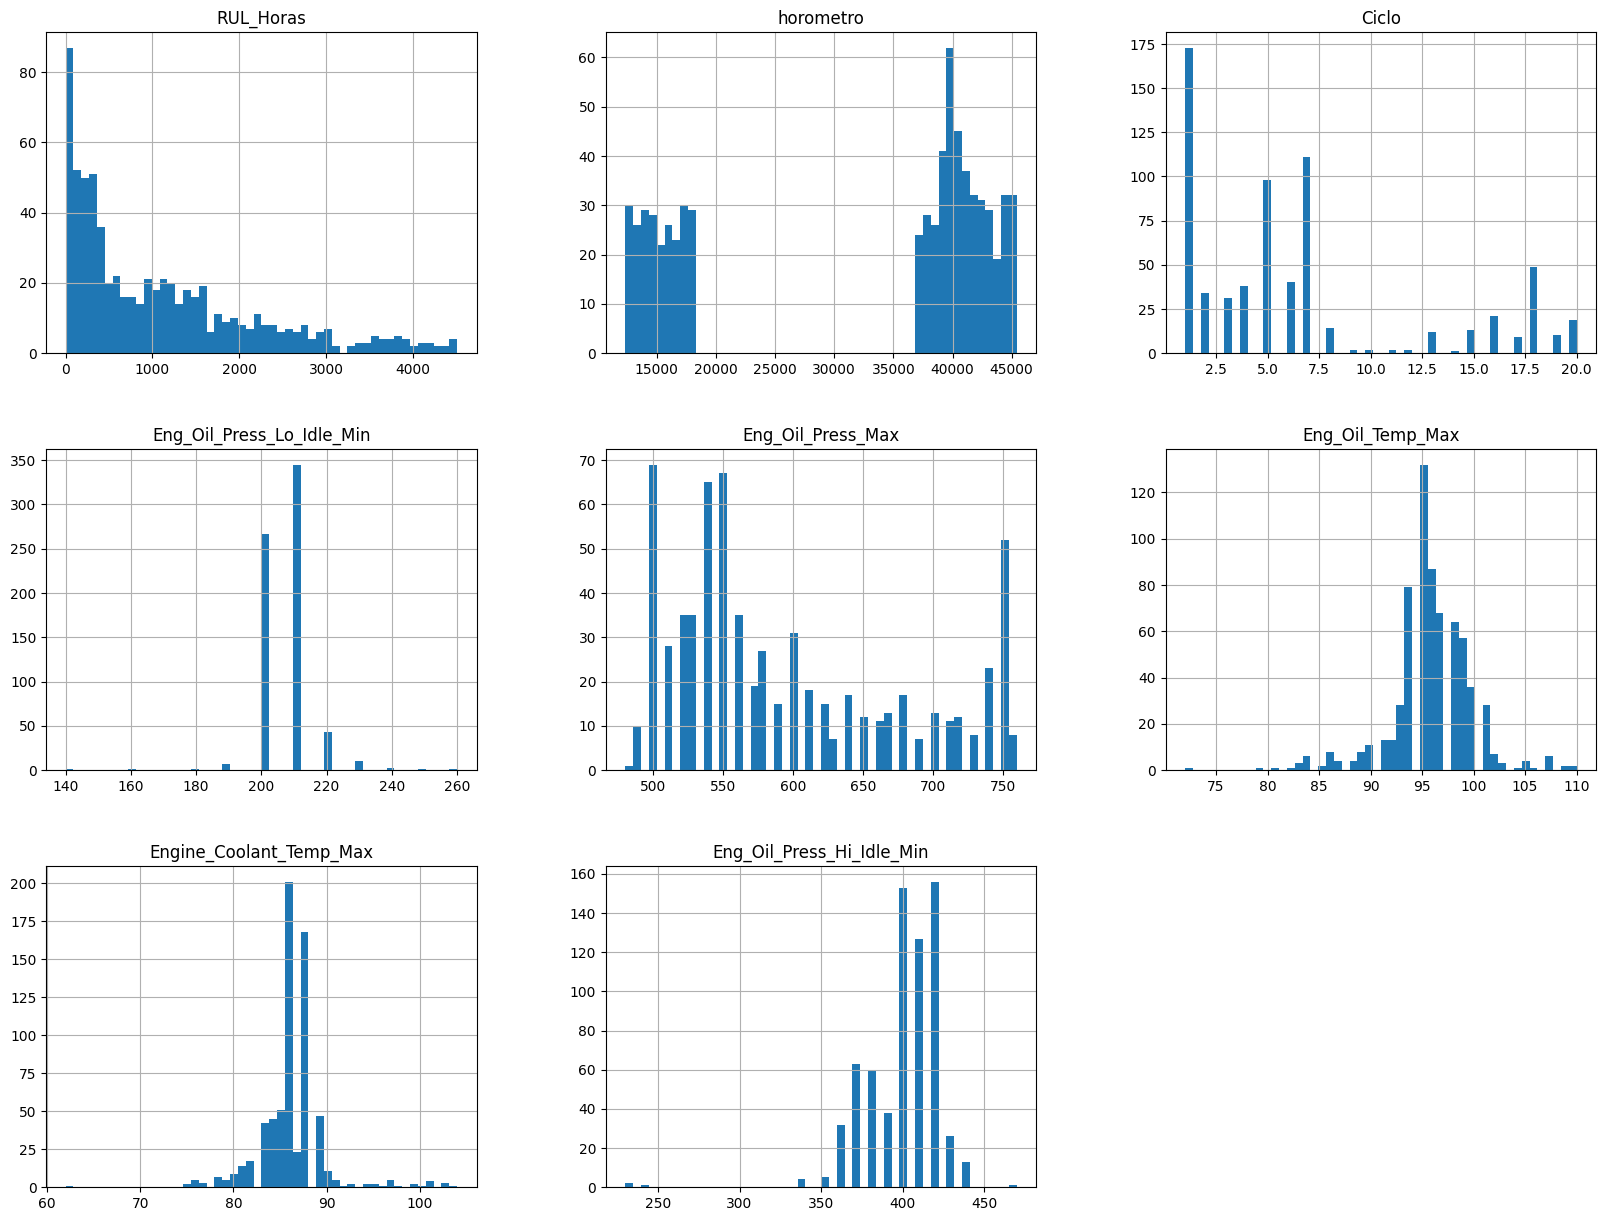

In [36]:
# visualización de los datos en histograms
data.hist(bins=50, figsize=(20,15))

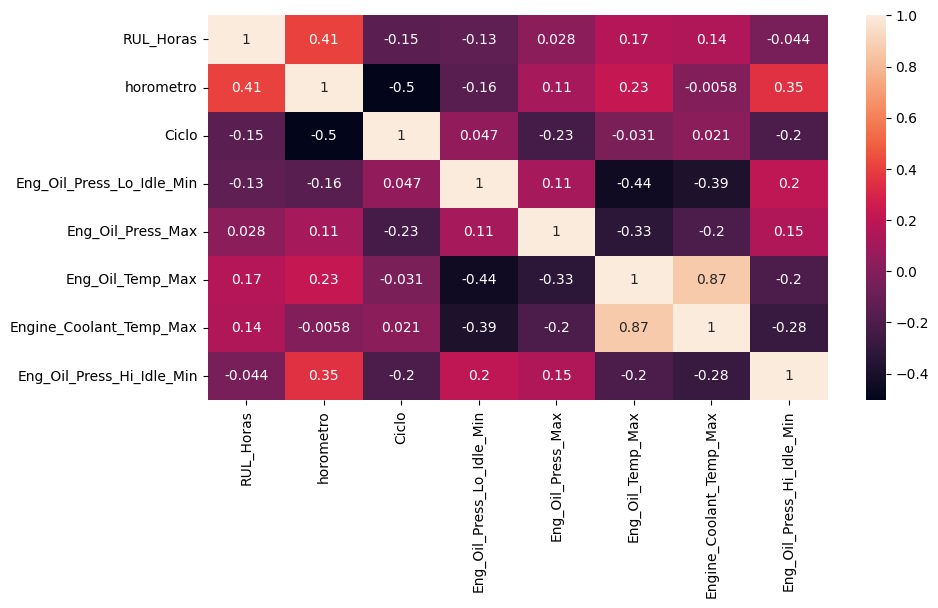

In [37]:
# Correlación
plt.figure(figsize=(10,5))
# Filtrar solo las columnas numéricas
numeric_data = data.select_dtypes(include='number')

# Crear el heatmap
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()

In [38]:
# Calcular la correlación con todas las columnas numéricas
corr = data.corr(numeric_only=True)

# Si quieres la correlación respecto a una variable específica (ej. "RUL_Horas")
correlacion = corr["RUL_Horas"].sort_values(ascending=False)

correlacion


,RUL_Horas
RUL_Horas,1.000000
horometro,0.410260
Eng_Oil_Temp_Max,0.170133
Engine_Coolant_Temp_Max,0.142754
Eng_Oil_Press_Max,0.028231
Eng_Oil_Press_Hi_Idle_Min,-0.043953
Eng_Oil_Press_Lo_Idle_Min,-0.130001
Ciclo,-0.147529


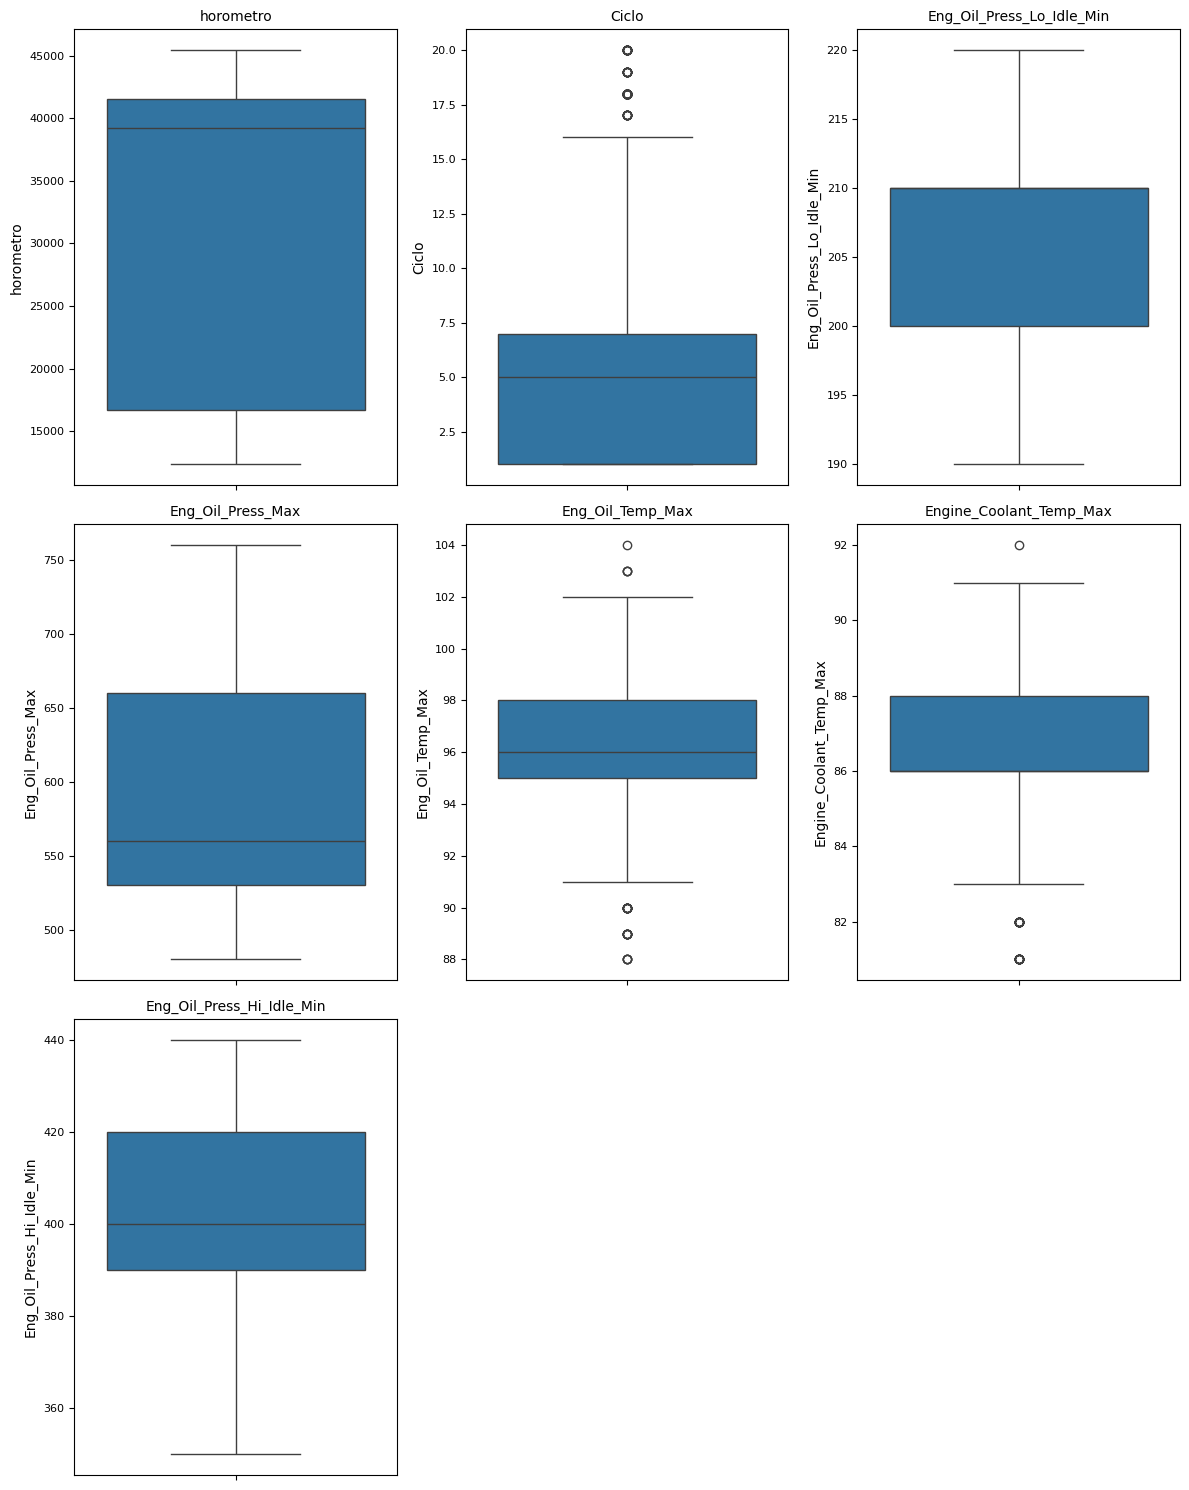

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Columnas de interés (excluyendo la target RUL_Horas)
cols = ['horometro','Ciclo','Eng_Oil_Press_Lo_Idle_Min','Eng_Oil_Press_Max','Eng_Oil_Temp_Max','Engine_Coolant_Temp_Max','Eng_Oil_Press_Hi_Idle_Min']

# Definir cantidad de filas (4 gráficos por fila)
n_cols = 3
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 5*n_rows))

# Aplanar los ejes (para recorrerlos fácilmente)
axes = axes.flatten()

# Graficar cada variable en su subplot
for i, col in enumerate(cols):
    sns.boxplot(y=data[col], ax=axes[i])
    axes[i].set_title(col, fontsize=10)
    axes[i].tick_params(axis='y', labelsize=8)

# Eliminar los ejes vacíos si sobran
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [43]:
# Informacion de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681 entries, 0 to 680
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   equipment                  681 non-null    object 
 1   RUL_Horas                  681 non-null    int64  
 2   horometro                  681 non-null    float64
 3   Ciclo                      681 non-null    int64  
 4   Eng_Oil_Press_Lo_Idle_Min  681 non-null    float64
 5   Eng_Oil_Press_Max          681 non-null    int64  
 6   Eng_Oil_Temp_Max           681 non-null    float64
 7   Engine_Coolant_Temp_Max    681 non-null    float64
 8   Eng_Oil_Press_Hi_Idle_Min  681 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 48.0+ KB


In [40]:
# Completamos los valores faltantes con la mediana
data['Eng_Oil_Press_Lo_Idle_Min'] = data['Eng_Oil_Press_Lo_Idle_Min'].fillna(data['Eng_Oil_Press_Lo_Idle_Min'].median())

In [41]:
# Tratamiento de outliers
# Reemplazar todos los NaN por 0
data = data.fillna(0)
variables_data=['Eng_Oil_Press_Lo_Idle_Min','Eng_Oil_Temp_Max','Engine_Coolant_Temp_Max','Eng_Oil_Press_Hi_Idle_Min']
#variables_data =['Eng_Oil_Press_Lo_Idle_Min','Eng_Oil_Press_Max','Eng_Oil_Temp_Max','Engine_Coolant_Temp_Max','Eng_Oil_Press_Hi_Idle_Min']
#variables_data=['Engine_Oil_Filter_Differential_Pressure','Eng_Oil_Press_Lo_Idle_Min','Eng_Oil_Press_Max','Eng_Oil_Temp_Max','DC_Power_Max','Engine_Coolant_Temp_Max','Eng_Oil_Press_Hi_Idle_Min']

for col in variables_data:
  if col in data.select_dtypes(include=[np.number]).columns:  # asegurar que sea numérica
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Reemplazar outliers por NaN
    data[col] = data[col].mask((data[col] < lower_limit) | (data[col] > upper_limit), np.nan)

# Si quieres luego reemplazar por la mediana:
data = data.fillna(data.median(numeric_only=True))

### Convertimos los datos categoricos a numéricos

In [44]:
from sklearn.preprocessing import OneHotEncoder
data_equipment = data[['equipment']]
cat_encoder = OneHotEncoder()
data_car_1hot = cat_encoder.fit_transform(data_equipment)

In [45]:
# Visualizar los datos categóricos
encoded_df = pd.DataFrame(data_car_1hot.toarray(), columns=cat_encoder.get_feature_names_out()).astype(int)
encoded_df

,equipment_C311,equipment_C314,equipment_C332
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
676,0,0,1
677,0,0,1
678,0,0,1
679,0,0,1


### Creamos los datos para Machine Learning

In [ ]:
# x=data[['horometro','Ciclo','Ambient_Temp_Max','Boost_RB_Press_Max','Exhaust_Temp_Max_LF','Exhaust_Temp_Max_LR','Steering_Press_Max','Ambient_Temp_Ave','Blow_by_Press_Max','Eng_Oil_Temp_Max','Exhaust_Temp_Max_RR',
# 'Ambient_Temp_Min','Engine_Coolant_Temp_Max','Motor_B_Power_Ave','Brake_Oil_Temp_LF_Max','DC_Power_Max','Eng_Oil_Press_Hi_Idle_Min','Hoist_Press2_Max',	'Engine_Oil_Filter_Differential_Pressure','Exhaust_Temp_Max_RF']]

In [46]:
# Variables dependientes e independientes
y = data['RUL_Horas']  # y = data['RUL_Horas'].values.reshape(-1,1)
x= data[['horometro','Ciclo','Eng_Oil_Press_Lo_Idle_Min','Eng_Oil_Press_Max','Eng_Oil_Temp_Max','Engine_Coolant_Temp_Max','Eng_Oil_Press_Hi_Idle_Min']]
x

,horometro,Ciclo,Eng_Oil_Press_Lo_Idle_Min,Eng_Oil_Press_Max,Eng_Oil_Temp_Max,Engine_Coolant_Temp_Max,Eng_Oil_Press_Hi_Idle_Min
0,39255.6,1,200.0,690,92.0,84.0,420.0
1,39275.6,1,210.0,680,91.0,83.0,420.0
2,39295.6,1,210.0,740,92.0,83.0,410.0
3,39315.6,1,210.0,720,95.0,83.0,420.0
4,39335.6,1,200.0,690,96.0,83.0,410.0
...,...,...,...,...,...,...,...
676,18170.2,20,200.0,540,95.0,86.0,360.0
677,18190.2,20,200.0,540,95.0,86.0,360.0
678,18210.2,20,210.0,630,94.0,86.0,360.0
679,18270.2,20,200.0,550,95.0,86.0,360.0


In [47]:
# concadenamos los valores independientes(valores de los sensores) con las variable categóricas(equipment)
data_concadenado= pd.concat([x,encoded_df],axis=1)  # unimos los datos cateoricos  co los datos independientes
data_concadenado.head()

,horometro,Ciclo,Eng_Oil_Press_Lo_Idle_Min,Eng_Oil_Press_Max,Eng_Oil_Temp_Max,Engine_Coolant_Temp_Max,Eng_Oil_Press_Hi_Idle_Min,equipment_C311,equipment_C314,equipment_C332
0,39255.6,1,200.0,690,92.0,84.0,420.0,1,0,0
1,39275.6,1,210.0,680,91.0,83.0,420.0,1,0,0
2,39295.6,1,210.0,740,92.0,83.0,410.0,1,0,0
3,39315.6,1,210.0,720,95.0,83.0,420.0,1,0,0
4,39335.6,1,200.0,690,96.0,83.0,410.0,1,0,0


In [48]:
# Tomamos los valores de data_concadenado y los asignamos a "x"
x= data_concadenado  # x= data_concadenado.values

In [49]:
x

,horometro,Ciclo,Eng_Oil_Press_Lo_Idle_Min,Eng_Oil_Press_Max,Eng_Oil_Temp_Max,Engine_Coolant_Temp_Max,Eng_Oil_Press_Hi_Idle_Min,equipment_C311,equipment_C314,equipment_C332
0,39255.6,1,200.0,690,92.0,84.0,420.0,1,0,0
1,39275.6,1,210.0,680,91.0,83.0,420.0,1,0,0
2,39295.6,1,210.0,740,92.0,83.0,410.0,1,0,0
3,39315.6,1,210.0,720,95.0,83.0,420.0,1,0,0
4,39335.6,1,200.0,690,96.0,83.0,410.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
676,18170.2,20,200.0,540,95.0,86.0,360.0,0,0,1
677,18190.2,20,200.0,540,95.0,86.0,360.0,0,0,1
678,18210.2,20,210.0,630,94.0,86.0,360.0,0,0,1
679,18270.2,20,200.0,550,95.0,86.0,360.0,0,0,1


# ENTRENAMIENTO CON MACHINE LEARNING
## Bosques aleatorios

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

# Entrenar Random Forest

#model = RandomForestRegressor()
model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)


# Evaluar métricas

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('\n**** MÉTRICAS ****')
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")
print('******************')



**** MÉTRICAS ****
MAE: 79.88
MSE: 31090.99
RMSE: 176.33
R²: 0.9671
******************


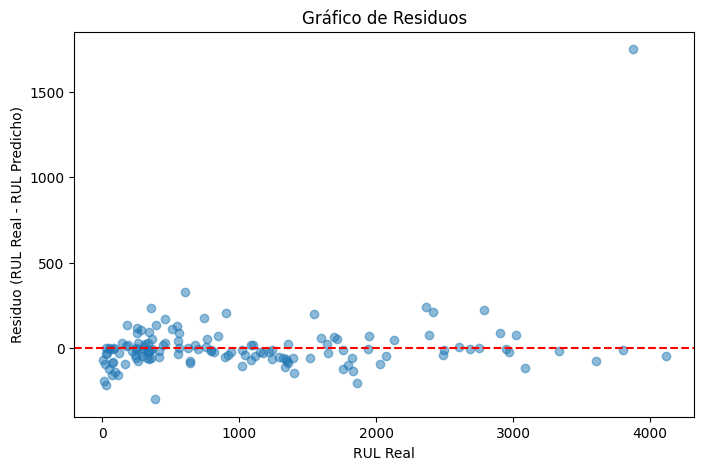

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Asegurar vectores 1D
y_test = np.ravel(y_test)   # convierte (n,1) -> (n,)
y_pred = np.ravel(y_pred)   # por si acaso

# Calcular residuos
residuos = y_test - y_pred

# Crear gráfico de dispersión
plt.figure(figsize=(8,5))
plt.scatter(y_test, residuos, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')

plt.xlabel("RUL Real")
plt.ylabel("Residuo (RUL Real - RUL Predicho)")
plt.title("Gráfico de Residuos")
plt.show()


In [60]:
import pandas as pd

# Supongamos que tienes tus datos de prueba con los equipos
# X_test todavía contiene la columna 'equipo'
# y_test son los valores reales (RUL real)
# y_pred son los valores predichos por el modelo

# Creamos un DataFrame con equipo, valor real y valor predicho
resultados = pd.DataFrame({
    "Equipo": X_test["equipment_C314"].iloc[:50].values,   # equipo al que pertenece
    "RUL Real": y_test[:50],                       # valores reales
    "RUL Predicción": y_pred[:50],                 # valores predichos
    "Diferencia": y_test[:50] - y_pred[:50]       # error de predicción
})

print(resultados)


    Equipo  RUL Real  RUL Predicción  Diferencia
0        0       125          155.14      -30.14
1        1      1947         1876.38       70.62
2        0       555          516.24       38.76
3        1      1113         1160.40      -47.40
4        0         4           73.84      -69.84
5        1       292          340.71      -48.71
6        1      2492         2502.28      -10.28
7        1       219          235.35      -16.35
8        1      1358         1448.66      -90.66
9        0       702          711.39       -9.39
10       0        26           61.71      -35.71
11       0      1795         1896.62     -101.62
12       1      2784         2562.74      221.26
13       0       171          268.83      -97.83
14       0      1348         1426.66      -78.66
15       1      2903         2816.91       86.09
16       0      1762         1888.82     -126.82
17       0       922          964.11      -42.11
18       0      1716         1664.52       51.48
19       0       180

#### pruebas para verificar si estana o no bien las variables

['horometro'] 0.9283972207718988
['horometro', 'Ciclo'] 0.9750027745021993
['horometro', 'Ciclo', 'Ambient_Temp_Max'] 0.9684713928387673
['horometro', 'Ciclo', 'Ambient_Temp_Max', 'Boost_RB_Press_Max'] 0.8883061881953085
['horometro', 'Ciclo', 'Ambient_Temp_Max', 'Boost_RB_Press_Max', 'Exhaust_Temp_Max_LF'] 0.8853529015323838
['horometro', 'Ciclo', 'Ambient_Temp_Max', 'Boost_RB_Press_Max', 'Exhaust_Temp_Max_LF', 'Exhaust_Temp_Max_LR'] 0.8737499279577652
['horometro', 'Ciclo', 'Ambient_Temp_Max', 'Boost_RB_Press_Max', 'Exhaust_Temp_Max_LF', 'Exhaust_Temp_Max_LR', 'Steering_Press_Max'] 0.8715957083695568
['horometro', 'Ciclo', 'Ambient_Temp_Max', 'Boost_RB_Press_Max', 'Exhaust_Temp_Max_LF', 'Exhaust_Temp_Max_LR', 'Steering_Press_Max', 'Blow_by_Press_Max'] 0.8787467220909118


# comprabaremos con otro modelo

In [53]:

pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.8 MB/s eta 0:00:00


In [55]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Lista de modelos a probar
modelos = {
    #"XGBoost": XGBRegressor(n_estimators=200, random_state=42, n_jobs=-1),
    #"LightGBM": LGBMRegressor(n_estimators=200, random_state=42, n_jobs=-1),
    "CatBoost": CatBoostRegressor(n_estimators=200, random_state=42, verbose=0)
}

resultados = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    resultados.append([nombre, mae, mse, rmse, r2])

# Mostrar resultados en tabla
import pandas as pd
df_resultados = pd.DataFrame(resultados, columns=["Modelo", "MAE", "MSE", "RMSE", "R²"])
print(df_resultados)


     Modelo         MAE           MSE        RMSE        R²
0  CatBoost  115.531777  28283.591359  168.177262  0.970058


In [ ]:
t=t[['RUL_Horas', 'horometro','Ciclo','Engine_Oil_Filter_Differential_Pressure','Eng_Oil_Press_Lo_Idle_Min',
 'Eng_Oil_Press_Hi_Idle_Min','Eng_Oil_Press_Max','Eng_Oil_Temp_Max','Engine_Coolant_Temp_Max','Exhaust_Temp_Max_RF',
 'Exhaust_Temp_Max_LF','Exhaust_Temp_Max_RR','Exhaust_Temp_Max_LR','Blow_by_Press_Max','Motor_A_Power_Max',
 'Motor_B_Power_Max','DC_Power_Ave','Motor_A_Power_Ave','Motor_B_Power_Ave','DC_Power_Ave','Motor_A_Torque_Max','Motor_B_Torque_Max',
 'Motor_A_Torque_Ave','Motor_B_Torque_Ave','Motor_Power_A_at_Retard_Mode_Max','Motor_Power_B_at_Retard_Mode_Max',
 'Motor_Torque_A_at_Retard_Mode_Max','Motor_Torque_B_at_Retard_Mode_Max']]